In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [45]:
# df = pd.read_csv('/content/drive/MyDrive/ForEX - ML 2 Minor Project/my_file.csv')
df = pd.read_csv('my_file.csv')
df

,Date_Quarter,AFGHANISTAN,ALBANIA,ALGERIA,ANGOLA,ANTIGUA-BARBUDA,ARGENTINA,ARMENIA,AUSTRALIA,AUSTRIA,...,UZBEKISTAN,VANUATU,VENEZUELA,VIETNAM,WESTERN SAMOA,YEMEN,YUGOSLAVIA,ZAMBIA,ZAMBIA.1,ZIMBABWE
0,2001-01-01,78400.00,142.40,76.539,19.706,2.7,1.000,550.00,1.903,1.083,...,793.5,142.45,704.00,14562.0,3.280,165.0,64.8000,3520.0,21.5252,80.0
1,2001-05-01,73000.00,149.00,78.101,19.706,2.7,1.000,554.68,1.979,1.181,...,793.5,145.89,714.00,14659.0,3.280,168.0,63.3102,3420.0,29.4134,118.0
2,2001-09-01,71500.00,142.00,76.429,20.389,2.7,1.000,557.00,1.894,1.100,...,850.0,145.89,736.00,14991.0,3.344,170.0,65.5330,3570.0,57.7216,260.0
3,2001-12-01,38200.00,136.30,78.078,30.044,2.7,1.000,565.00,1.955,1.122,...,890.0,145.89,757.00,15081.0,3.496,173.0,65.5330,3735.0,74.8046,345.0
4,2002-01-01,35000.00,139.81,78.319,34.320,2.7,2.080,566.00,1.935,1.153,...,960.0,145.89,1015.00,15139.0,3.484,173.0,66.7960,4300.0,71.8046,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2015-09-01,63.80,123.99,105.739,145.000,2.7,9.420,475.00,1.423,0.892,...,2664.0,110.24,6.30,22475.0,2.584,214.5,102.7278,5455.0,12.1150,1.0
59,2015-12-01,67.90,125.54,106.878,145.000,2.7,12.946,484.00,1.368,0.919,...,2857.0,108.55,6.30,22480.0,2.502,214.5,103.0056,5455.0,10.9900,1.0
60,2016-01-01,68.45,121.35,108.301,160.000,2.7,14.593,480.00,1.298,0.878,...,2925.0,104.37,270.47,22286.0,2.470,214.5,103.9202,5455.0,11.0300,1.0
61,2016-05-01,68.22,123.16,109.866,170.000,2.7,14.951,480.00,1.344,0.900,...,2993.0,109.10,626.01,22281.0,2.462,250.5,105.3232,5455.0,9.8000,1.0


In [46]:
country = 'INDIA'

In [47]:
df_country = df[['Date_Quarter', country]]
df_country

,Date_Quarter,INDIA
0,2001-01-01,46.50
1,2001-05-01,46.80
2,2001-09-01,47.00
3,2001-12-01,47.90
4,2002-01-01,48.55
...,...,...
58,2015-09-01,66.00
59,2015-12-01,66.10
60,2016-01-01,65.90
61,2016-05-01,67.40


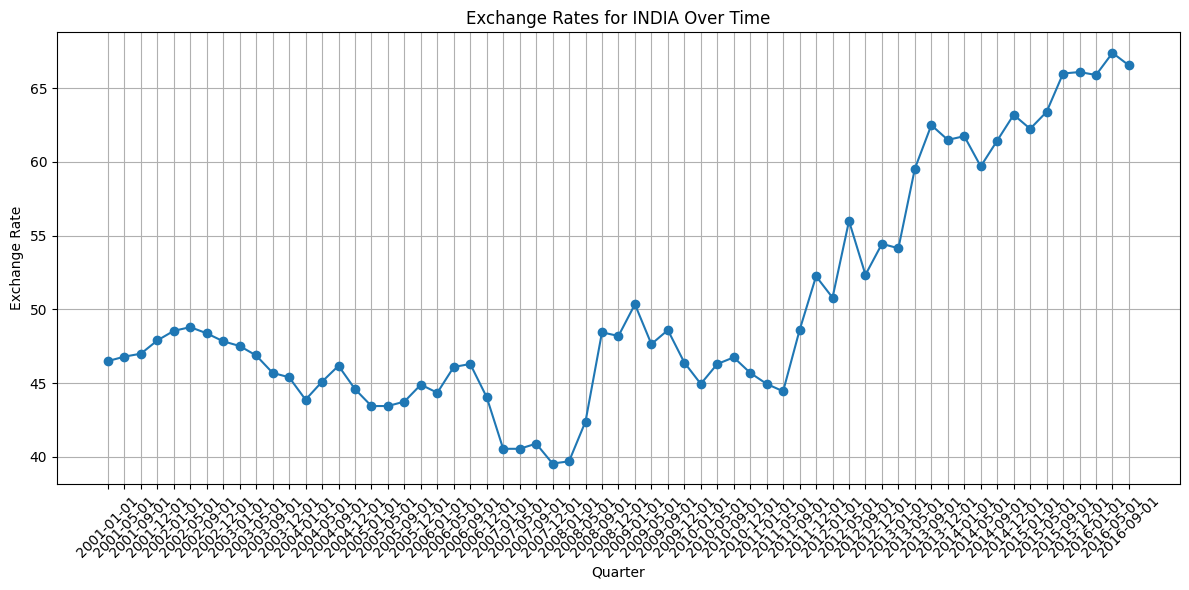

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df_country['Date_Quarter'], df_country['INDIA'], marker='o', linestyle='-')
plt.title(f'Exchange Rates for {country} Over Time')
plt.xlabel('Quarter')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
ma10 = df_country[f'{country}'].rolling(10).mean()
ma10

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
58    62.130
59    62.785
60    63.125
61    63.715
62    64.195
Name: INDIA, Length: 63, dtype: float64

Text(0, 0.5, 'Exchange Rate')

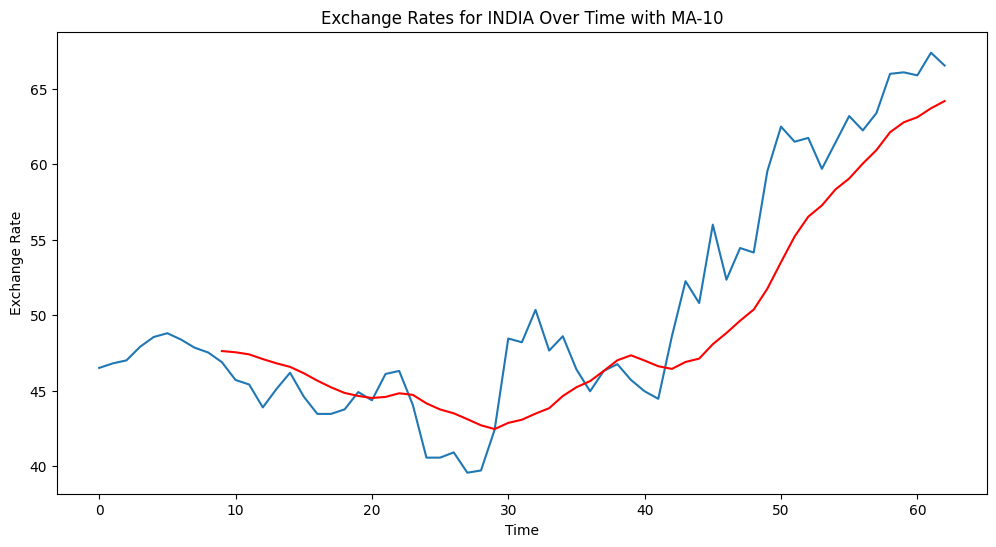

In [50]:
plt.figure(figsize = (12, 6))
plt.plot(df_country[f'{country}'])
plt.plot(ma10, 'r')
plt.title(f'Exchange Rates for {country} Over Time with MA-10')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')

In [51]:
ma20 = df_country[f'{country}'].rolling(20).mean()
ma20

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
       ...   
58    56.2500
59    57.2700
60    58.3175
61    59.4650
62    60.3625
Name: INDIA, Length: 63, dtype: float64

Text(0, 0.5, 'Exchange Rate')

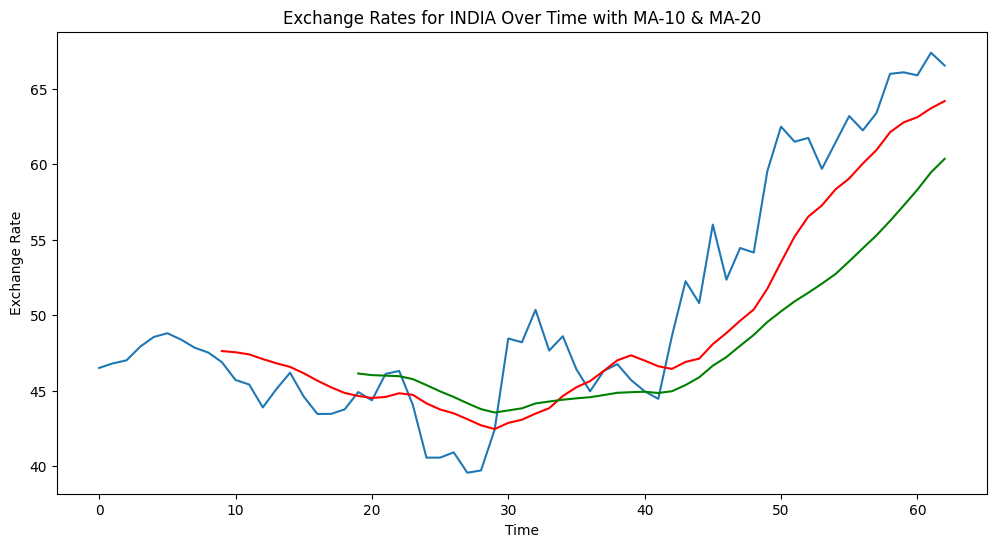

In [52]:
plt.figure(figsize = (12, 6))
plt.plot(df_country[f'{country}'])
plt.plot(ma10, 'r')
plt.plot(ma20, 'g')
plt.title(f'Exchange Rates for {country} Over Time with MA-10 & MA-20')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')

In [53]:
# Splitting Data into Training and Testing -> 70-30 split

data_training = pd.DataFrame(df_country[f'{country}'][0:int(len(df_country)*0.70)])
data_testing = pd.DataFrame(df_country[f'{country}'][int(len(df_country)*0.70):int(len(df_country))])

print(data_training.shape)
print(data_testing.shape)

(44, 1)
(19, 1)


In [54]:
data_training.head()

,INDIA
0,46.50
1,46.80
2,47.00
3,47.90
4,48.55


In [55]:
data_testing.head()

,INDIA
44,50.80
45,56.00
46,52.35
47,54.45
48,54.15


In [56]:
# Scaling the Data between (0,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [57]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.54724409],
       [0.57086614],
       [0.58661417],
       [0.65748031],
       [0.70866142],
       [0.72834646],
       [0.69527559],
       [0.65275591],
       [0.62755906],
       [0.57716535],
       [0.48425197],
       [0.46062992],
       [0.34094488],
       [0.43700787],
       [0.52204724],
       [0.3976378 ],
       [0.30708661],
       [0.30708661],
       [0.33070866],
       [0.42125984],
       [0.37795276],
       [0.51574803],
       [0.53149606],
       [0.35433071],
       [0.07874016],
       [0.07874016],
       [0.10629921],
       [0.        ],
       [0.01181102],
       [0.22440945],
       [0.7007874 ],
       [0.68110236],
       [0.8503937 ],
       [0.63779528],
       [0.71259843],
       [0.53937008],
       [0.42519685],
       [0.53149606],
       [0.56692913],
       [0.48425197],
       [0.42519685],
       [0.38582677],
       [0.71259843],
       [1.        ]])

In [58]:
data_training_array.shape

(44, 1)

In [59]:
x_train = []
y_train = []

for i in range(40, data_training_array.shape[0]):
    x_train.append(data_training_array[i-40: i])
    y_train.append(data_training_array[i, 0])

In [60]:
x_train

[array([[0.54724409],
        [0.57086614],
        [0.58661417],
        [0.65748031],
        [0.70866142],
        [0.72834646],
        [0.69527559],
        [0.65275591],
        [0.62755906],
        [0.57716535],
        [0.48425197],
        [0.46062992],
        [0.34094488],
        [0.43700787],
        [0.52204724],
        [0.3976378 ],
        [0.30708661],
        [0.30708661],
        [0.33070866],
        [0.42125984],
        [0.37795276],
        [0.51574803],
        [0.53149606],
        [0.35433071],
        [0.07874016],
        [0.07874016],
        [0.10629921],
        [0.        ],
        [0.01181102],
        [0.22440945],
        [0.7007874 ],
        [0.68110236],
        [0.8503937 ],
        [0.63779528],
        [0.71259843],
        [0.53937008],
        [0.42519685],
        [0.53149606],
        [0.56692913],
        [0.48425197]]),
 array([[0.57086614],
        [0.58661417],
        [0.65748031],
        [0.70866142],
        [0.72834646],
        

In [61]:
y_train

[0.4251968503937009,
 0.3858267716535435,
 0.7125984251968505,
 0.9999999999999996]

In [62]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [63]:
# Model Creation

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [64]:
model = Sequential()

model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 40, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 40, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 40, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 40, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 40, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 40, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.4607
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4381
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4164
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4023
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.3728
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3221
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.2639
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1680
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1415
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0482
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2443
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1842
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0771
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0949
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1358
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/s

In [67]:
model.save('LSTM_Model_Max.h5')

In [68]:
data_testing.head()

,INDIA
44,50.80
45,56.00
46,52.35
47,54.45
48,54.15


In [69]:
past_40_days = data_training.tail(40)

In [70]:
final_df = pd.concat([past_40_days, data_testing], ignore_index=True)

In [71]:
final_df.head()

,INDIA
0,48.55
1,48.80
2,48.38
3,47.84
4,47.52


In [72]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.32315978],
       [0.33213645],
       [0.31705566],
       [0.29766607],
       [0.28617594],
       [0.26319569],
       [0.22082585],
       [0.21005386],
       [0.15547576],
       [0.19928187],
       [0.23806104],
       [0.18132855],
       [0.14003591],
       [0.14003591],
       [0.1508079 ],
       [0.19210054],
       [0.17235189],
       [0.23518851],
       [0.24236984],
       [0.16157989],
       [0.03590664],
       [0.03590664],
       [0.04847397],
       [0.        ],
       [0.005386  ],
       [0.10233393],
       [0.31956912],
       [0.31059246],
       [0.38779174],
       [0.29084381],
       [0.32495512],
       [0.2459605 ],
       [0.19389587],
       [0.24236984],
       [0.25852783],
       [0.22082585],
       [0.19389587],
       [0.17594255],
       [0.32495512],
       [0.45601436],
       [0.40394973],
       [0.59066427],
       [0.45960503],
       [0.53500898],
       [0.52423698],
       [0.71813285],
       [0.82405745],
       [0.788

In [73]:
input_data.shape

(59, 1)

In [74]:
x_test = []
y_test = []

for i in range(40, input_data.shape[0]):
    x_test.append(input_data[i-40:i])
    y_test.append(input_data[i, 0])

In [75]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(19, 40, 1)
(19,)


In [76]:
# Making the predictions

y_predicted = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


In [77]:
y_predicted.shape

(19, 1)

In [78]:
y_test

array([0.40394973, 0.59066427, 0.45960503, 0.53500898, 0.52423698,
       0.71813285, 0.82405745, 0.78815081, 0.79712747, 0.72351885,
       0.78635548, 0.8491921 , 0.81508079, 0.85637343, 0.9497307 ,
       0.95332136, 0.94614004, 1.        , 0.96947935])

In [79]:
y_predicted

array([[0.49695504],
       [0.49802887],
       [0.49949354],
       [0.5015051 ],
       [0.5041357 ],
       [0.5073969 ],
       [0.5114081 ],
       [0.5163616 ],
       [0.52223057],
       [0.5292359 ],
       [0.5370243 ],
       [0.54560226],
       [0.5552874 ],
       [0.5659436 ],
       [0.57733953],
       [0.5893928 ],
       [0.60195917],
       [0.61523354],
       [0.62887114]], dtype=float32)

In [80]:
# Inverse Scaling them again

scaler.scale_

array([0.03590664])

In [81]:
scale_factor = 1/0.03590664
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

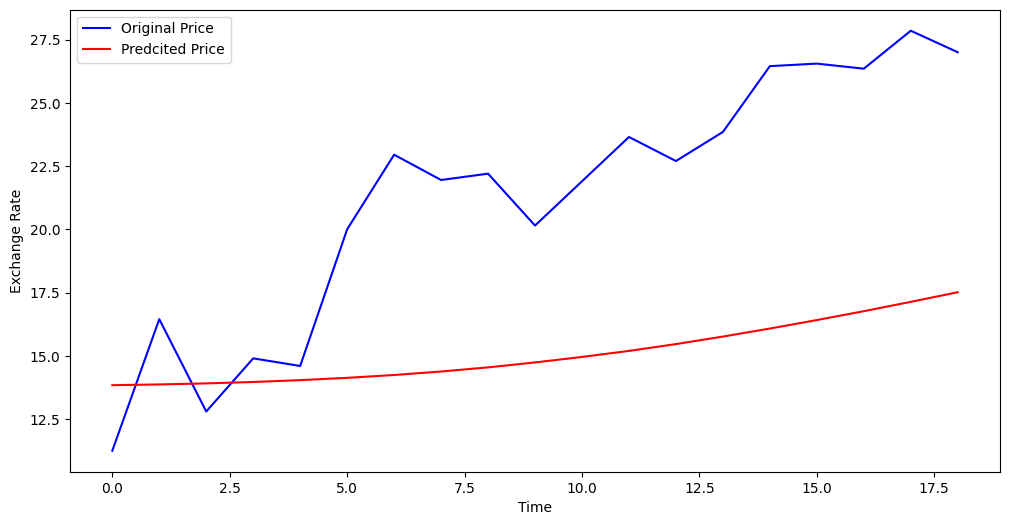

In [82]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = "Predcited Price")
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()